# Airports in Scotland

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import list of nodes
airports = pd.read_csv("ListOfAirportsAndAirfields.csv")
airports.head()

,id,airport,latitude,longitude
0,0,Aberdeen International Airport,57.2037,-2.2005
1,1,Edinburgh Airport,55.9474,-3.3614
2,2,Glasgow Airport,55.8699,-4.4326
3,3,Glasgow Prestwick Airport,55.5112,-4.5911
4,4,Oban Airport,56.4655,-5.3983


In [2]:
# import list of edges
edges = pd.read_csv("FlightRoutes.csv")
edges.head()

,departure,destination
0,0,11
1,0,13
2,0,15
3,1,13
4,1,12


## Data cleaning and formatting

In [3]:
airports.dtypes

id             int64
airport       object
latitude     float64
longitude    float64
dtype: object

Let's make sure the airports are stored as categorical data.

In [4]:
airports["airport"] = airports["airport"].astype("category")

In [5]:
edges.dtypes

departure      int64
destination    int64
dtype: object

Now let's replace all the numerical identifiers with the names of the airports in our edges list.

## Create Network

In [6]:
# create graph
G = nx.Graph()
for i, node in airports.iterrows():
    G.add_node(node["id"], pos=(node["longitude"], node["latitude"]))

# add edges to graph
all_edges = {}
for i, edge in edges.iterrows():
    G.add_edge(edge["departure"], edge["destination"])
    #all_edges[(edge["departure"], edge["destination"])] = edge["departure"]+"<-->"+edge["destination"]

## Generate Network Map

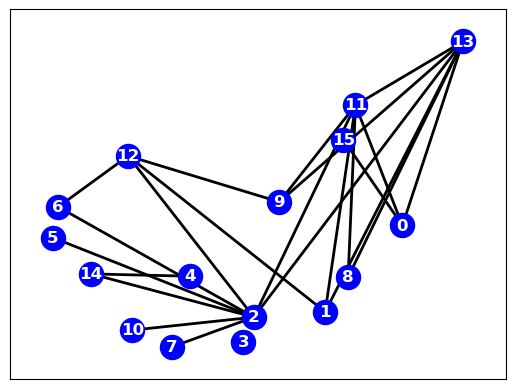

In [7]:
# draw the network
pos = nx.get_node_attributes(G, "pos")
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="blue", alpha=1)
nx.draw_networkx_labels(G, pos, font_color="white", font_weight="bold")
nx.draw_networkx_edges(G, pos, edge_color="black", width=2, arrows=False)

## Plot against a map of Scotland

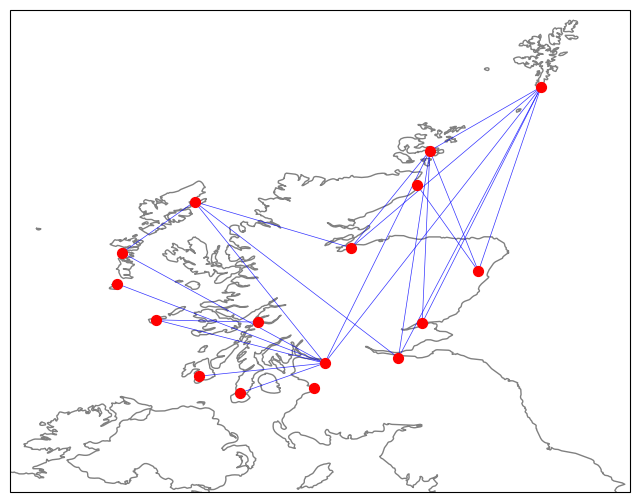

In [8]:
# plot map and points
mapProjection = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=mapProjection)
ax.set_extent([-9, 0, 54, 61], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
ax.add_feature(cfeature.BORDERS, edgecolor="grey")
#ax.gridlines()

ax.scatter(x=airports.longitude, y=airports.latitude, color="red", s=50, alpha=1, zorder=3,transform=ccrs.PlateCarree())

# plot connections
for u, v in G.edges():
    lon1, lat1 = pos[u]
    lon2, lat2 = pos[v]

    ax.plot(
        [lon1, lon2],
        [lat1, lat2],
        color="blue",
        linewidth=0.5,
        alpha=0.8,
        transform=ccrs.Geodetic(),
        zorder=2
    )

Note: Data from Oban Airport to Coll and Colonsay has been left out of the dataset.